Ana denklem

l= w1.x1 + w2.x2 + b.1
* x: İnput
* w: Weight
* b: Bias
* l: Çizgiye göre konum


Gerekli kütüphaneleri ekleme

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Ana denklem doğrusunu çizen fonksiyon
* x1: İlk konum
* x2: Son konum

In [13]:
def ciz(x1, x2):
    cizgi = plt.plot(x1, x2, "-")

Sigmoid fonksiyonu ile olasılık değerini hesaplama
* l: Çizgiye göre konum

In [3]:
def sigmoid(l):
    return 1 / (1 + np.exp(-l))

Cross Entropy yöntemi
* w: Ağırlıklar matriksi
* x: Girdiler (noktalar) matriksi
* y: Çıktılar matriksi

In [4]:
def hata_hesaplama(w, x, y):
    # Toplam nokta sayısı (1D yaparak bulabiliriz)
    m = y.shape[0]
    
    # Olasılık hesaplama (l = x * w)
    p = sigmoid(x * w)
    
    # Cross Entropy formülü
    # Matriks çarpımı olduğundan transpozunu alarak çarpılabilir hale sokuyoruz
    return -(1/m) * (np.log(p).T * y + np.log(1-p).T * (1-y))

Gradient Descent yöntemi ile çizgiyi yavaş yavaş optimize etme
* w: Katsayılar matriksi
* x: Noktalar, girdiler matriksi
* y: Çıktılar, etiketler matriksi
* alpha: Adım oranı

In [17]:
def gradient_descent(w, x, y, alpha):
    # Nokta sayısı
    n = y.shape[0]
    
    # Ne kadar fazla döngü olursa hata o kadar azalır
    for i in range(500):
        # Olasılığı hesaplama
        p = sigmoid(x * w)
        
        # Değişimi hesaplama
        degisim = (x.T * (p - y)) * (alpha / n)
        
        # Degisimi uygulama
        w = w - degisim
        
        # Katsayıları alma
        w1 = w.item(0)
        w2 = w.item(1)
        b = w.item(2)
        
        # Çizginin başlangıç noktalarını hesaplama
        x1 = np.array([x[:, 0].min(), x[:, 0].max()])
        x2 = -b / w2 + x1 * (-w1 / w2)
                
    # Referans çizgisini çizdirme
    ciz(x1, x2)
        

Inputların matriksinin oluşturulması

x = | x1, x2, 1 |

In [6]:
# Nokta sayısı tanımlama
n_nokta = 700

# Noktarları oluşturma

# Her defasında aynı rastgele değerlerin atanamasını sağlar. 
# İnceleme işlemi için aynı değerler lazım
np.random.seed(0)

# x1 için dikey ters parabol oluşturma
rx1_ust = np.random.normal(10, 2, n_nokta)
rx1_alt = np.random.normal(5, 2, n_nokta)

# x2 için yatay ters parabol oluşturma
rx2_ust = np.random.normal(12, 2, n_nokta)
rx2_alt = np.random.normal(6, 2, n_nokta)

# Sabit değerin katsayısını oluşturma
bias = np.ones(n_nokta)

# İlk satır x, ikinci satır y verisi olur ([x,x], [y,y]). Matrix işlemleri yapmak için bize 
# ([x,y], [x, y]) tipinde veri lazım bu sebeple transpozunu alıyoruz.
ust_bolge = np.array([rx1_ust, rx2_ust, bias]).T
alt_bolge = np.array([rx1_alt, rx2_alt, bias]).T

# Vektorel olarak ekleme işlemi
x = np.vstack((ust_bolge, alt_bolge))

Katsayılar matriksinin oluşturulması

w = |w1| |w2| |b |

In [7]:
# Matrix çarpımı yapmak için x1, x2, ve sabit verilerinin katsayıları
# Transpozunu almalıyız çünkü yatay veri ile dikey veri çarpılır
w = np.matrix([np.zeros(3)]).T

Outputları belirleme
* İlk olarak 0'lar, ikinci olarak 1'ler ekleniyor
* Bu verilere dikey olarak ihtiyacımız var

In [8]:
# reshape (satır, sütun)
y = np.array([np.zeros(n_nokta), np.ones(n_nokta)]).reshape(n_nokta * 2, 1)

Koordinat sistemine noktaların eklenmesi ve sistemin ekrana çizilmesi
* Kırmızı: 0 (false)
* Mavi: 1 (true)

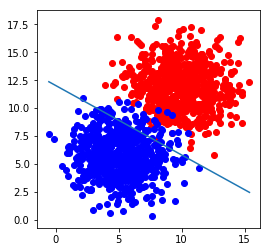

In [18]:
# Koordinat sistemi parçası oluşturma
# figsize (keyword): x,y uzunlukları
_, ax = plt.subplots(figsize=(4, 4))

# 0. ve 1. sütundaki her (:) satırı alma ve bu verileri koordinat sisteminde gösterme
# Kırmızılar: 0 (false) Maviler: 1 (true)
ax.scatter(ust_bolge[:, 0], ust_bolge[:, 1], color='r')
ax.scatter(alt_bolge[:, 0], alt_bolge[:, 1], color='b')

# Referans çizgisini çizme
gradient_descent(w, x, y, 0.06)

# Koordinat sistemini gösterme
plt.show()